In [70]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

In [71]:
games_df = pd.read_csv('boardgames_dataset.csv', sep = ';') #why not use comma?

# Basic Stuff
First I'll take a look at the basic shape of the dataset. How many columns, how many entries, data types and missing values

In [72]:
# Taking a look at the shape
# 20k rows and 14 columns
games_df

,name,yearpublished,sortindex,minplayers,maxplayers,minplaytime,maxplaytime,minage,usersrated,average,stddev,avgweight,numweights,numcomments,boardgamehonor,boardgamecategory,boardgamemechanic,boardgamefamily
0,Gloomhaven,2017,1,1,4,60,120,12,31254,8.85292,1.59819,3.8078,1311,5972,['2017 Best Science Fiction or Fantasy Board G...,"['Adventure', 'Exploration', 'Fantasy', 'Fight...","['Campaign / Battle Card Driven', 'Cooperative...","['Campaign Games', 'Components: Miniatures', '..."
1,Pandemic Legacy Season 1,2015,2,2,4,60,60,13,34729,8.62499,1.59463,2.8301,971,5477,['2015 Cardboard Republic Immersionist Laurel ...,"['Environmental', 'Medical']","['Action Points', 'Cooperative Game', 'Hand Ma...","['Campaign Games', 'Legacy', 'Pandemic']"
2,Terraforming Mars,2016,3,1,5,120,120,12,48339,8.42299,1.36938,3.2313,1863,7274,['2016 Cardboard Republic Architect Laurel Nom...,"['Economic', 'Environmental', 'Industry / Manu...","['Card Drafting', 'End Game Bonuses', 'Hand Ma...","['Fryxgames Future Timeline', 'Planets: Mars',..."
3,Through the Ages A New Story of Civilization,2015,4,2,4,120,120,14,18269,8.49419,1.49542,4.3850,891,2660,['2015 Golden Geek Best Strategy Board Game No...,"['Card Game', 'Civilization', 'Economic']","['Action Points', 'Auction/Bidding', 'Auction:...","['Tableau Building', 'Through the Ages']"
4,Brass Birmingham,2018,5,2,4,60,120,14,10070,8.62031,1.22876,3.9122,467,1702,['2018 Golden Geek Best Board Game Artwork & P...,"['Economic', 'Industry / Manufacturing', 'Tran...","['Hand Management', 'Income', 'Loans', 'Market...","['Beer', 'Brass', 'Cities: Birmingham (England..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,Franchise,1990,19996,2,8,90,90,0,3,6.00000,2.94392,0.0000,0,2,['None'],"['Economic', 'Negotiation']","['Simulation', 'Trading']",['Sports: Baseball']
19996,Punto y Raya,1988,19997,2,2,20,20,0,1,4.00000,0.00000,0.0000,0,2,['None'],['Abstract Strategy'],['Enclosure'],['Dots and Boxes']
19997,3 Up,1972,19998,2,4,20,20,5,1,6.00000,0.00000,0.0000,0,4,['None'],"['Abstract Strategy', 'Childrens Game']",['Pattern Building'],"['Airfix edition', 'Lakeside edition', 'Wexler..."
19998,Dino-Checkers,1989,19999,2,2,30,30,6,20,5.77500,1.76405,0.0000,0,13,['None'],"['Abstract Strategy', 'Childrens Game']",['Area Majority / Influence'],['Animals: Dinosaurs']


In [73]:
games_df.dtypes #All dtypes seem ok (no conversion needed)

name                  object
yearpublished          int64
sortindex              int64
minplayers             int64
maxplayers             int64
minplaytime            int64
maxplaytime            int64
minage                 int64
usersrated             int64
average              float64
stddev               float64
avgweight            float64
numweights             int64
numcomments            int64
boardgamehonor        object
boardgamecategory     object
boardgamemechanic     object
boardgamefamily       object
dtype: object

In [74]:
games_df.isna().sum() # No missing values. Noice.

name                 0
yearpublished        0
sortindex            0
minplayers           0
maxplayers           0
minplaytime          0
maxplaytime          0
minage               0
usersrated           0
average              0
stddev               0
avgweight            0
numweights           0
numcomments          0
boardgamehonor       0
boardgamecategory    0
boardgamemechanic    0
boardgamefamily      0
dtype: int64

# Analizing Variables by themselves
Now I want to look at each variable individually and check their distributions

## yearpublished

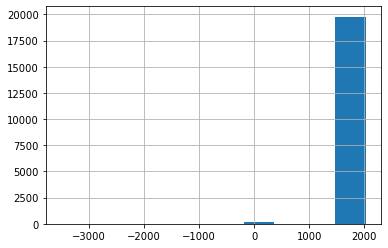

In [75]:
#year plublished
games_df['yearpublished'].hist()

Whe have a few games that the year published is very low. We can investigate further and verify that those are just really old games:

https://en.wikipedia.org/wiki/Senet
https://en.wikipedia.org/wiki/Xiangqi

For these games, we can also see that the year plublished is an estimate. Senet was hardly published precisely on 3500 B.C.


In [76]:
games_df.loc[games_df['yearpublished'] < 1000].sort_values(by= 'yearpublished')

,name,yearpublished,sortindex,minplayers,maxplayers,minplaytime,maxplaytime,minage,usersrated,average,stddev,avgweight,numweights,numcomments,boardgamehonor,boardgamecategory,boardgamemechanic,boardgamefamily
6826,Senet,-3500,6827,2,2,30,30,6,592,5.89218,1.63069,1.4833,60,285,['None'],"['Abstract Strategy', 'Dice', 'Religious']","['Dice Rolling', 'Roll / Spin and Move']","['Continent: Africa', 'Country: Egypt', 'Gammon']"
1222,Backgammon,-3000,1223,2,2,30,30,8,10704,6.52852,1.59917,2.0183,876,2835,['None'],"['Abstract Strategy', 'Dice']","['Betting and Bluffing', 'Dice Rolling', 'Roll...","['3M Bookshelf Series', 'Characters: Austin Po..."
19512,Mehen,-3000,19513,2,6,20,20,5,13,5.57692,1.70797,1.0000,1,11,['None'],"['Abstract Strategy', 'Racing']","['Dice Rolling', 'Roll / Spin and Move']",['Ancient Board Games']
18288,Marbles,-3000,18289,0,0,10,10,4,417,4.67789,1.72737,1.1064,47,150,['None'],"['Action / Dexterity', 'Childrens Game', 'Game...","['Action / Dexterity', 'Childrens Game', 'Game...","['Finger Flicking Games', 'Marble Games']"
152,Go,-2200,153,2,2,30,180,8,13752,7.63465,1.91180,3.9956,1353,3514,['None'],['Abstract Strategy'],['Enclosure'],"['3M Bookshelf Series', 'Combinatorial', 'Go',..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10194,Mia,600,10195,2,12,20,20,8,104,6.15096,1.73044,1.1818,11,37,['None'],"['Bluffing', 'Dice']","['Betting and Bluffing', 'Dice Rolling']",['Dice cup bluffing games']
12775,Chaturanga,650,12776,2,4,30,30,8,93,5.93387,1.27079,2.2500,16,55,['None'],['Abstract Strategy'],"['Dice Rolling', 'Grid Movement', 'Player Elim...",['Chess Games']
3731,Kalah,700,3732,2,2,10,10,5,5375,5.88713,1.41687,1.6348,408,1504,['None'],['Abstract Strategy'],['Mancala'],"['Mancala', 'Combinatorial', 'Continent: Afric..."
5987,Go-Moku,700,5988,2,2,5,5,8,510,6.00296,1.73093,1.9038,52,180,['None'],['Abstract Strategy'],['Pattern Building'],"['Combinatorial', 'Go', 'n in a row', 'Ravensb..."


The question is: what year is a reasonable year to split modern games from old games?

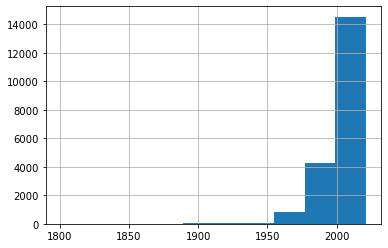

In [77]:
games_df.loc[games_df['yearpublished'] > 1800, 'yearpublished'].hist()

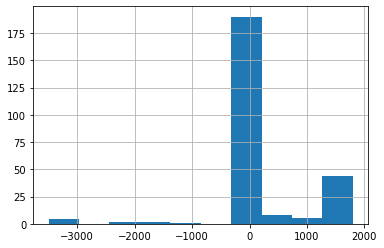

In [78]:
games_df.loc[games_df['yearpublished'] <= 1800, 'yearpublished'].hist() #1850 seem fair

Only by looking at they year published, I could pick up a few things:

- Most games were published on centuries 19 and 20
- There are about 200 games on century 0. It seems like these are actually games with unkown publishing dates
- My suspicion is that this dataset originally had missing values, but someone replaced missing values with zeroes
- If I'm correct, them we gotta watch out for zeroes in other columns as well (may be missing values)
- Also it's probably going to be a pain in the ass to differentiate between missing values zeroes and true zeroes
- There are some millenia old games as well. In those cases, the year of publishing are estimates and are less meaningfull
- I also noticed looking over the dataset that oriental games enconding problem. Not sure if this is a real problem tough.

A good suggestion to progress with the analisys is to separate modern games from old ones and analyze them seperatly as we..

In [79]:
games_df['age_classification'] = pd.cut(games_df['yearpublished'], bins = [0,1850, np.inf], labels = ['old', 'modern'])

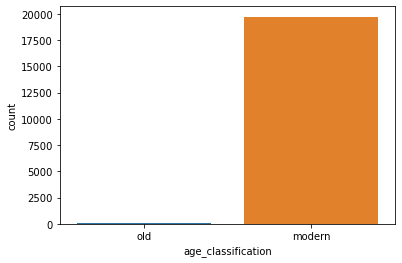

In [80]:
sns.countplot(x = 'age_classification', data = games_df)

## sortindex
This seem to be a column for sorting. The histogram should look flat and there should be no duplicate values.

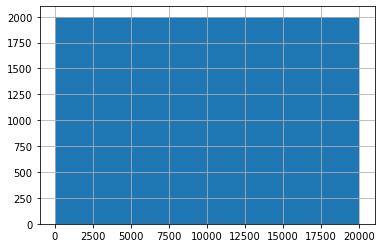

In [81]:
games_df['sortindex'].hist()

In [82]:
games_df['sortindex'].duplicated().any()

False

All in order

## name

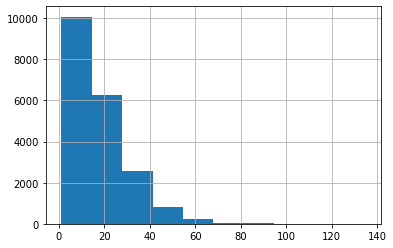

In [83]:
#What are the longest and shortest names?
games_df['name_len'] = games_df['name'].str.len()
games_df['name_len'].hist()

In [84]:
games_df.sort_values(by = 'name_len')

,name,yearpublished,sortindex,minplayers,maxplayers,minplaytime,maxplaytime,minage,usersrated,average,stddev,avgweight,numweights,numcomments,boardgamehonor,boardgamecategory,boardgamemechanic,boardgamefamily,age_classification,name_len
8920,1,2013,8921,2,8,15,15,6,220,6.07711,1.63805,1.3077,13,54,['None'],"['Card Game', 'Memory', 'Party Game']",['Memory'],"['Chinese edition', 'Multilingual first editio...",modern,1
4075,I,2015,4076,2,4,90,90,13,231,7.28879,1.51541,3.0769,26,89,['None'],"['Bluffing', 'Deduction', 'Spies/Secret Agents...","['Hand Management', 'Point to Point Movement']",['Crowdfunding: Kickstarter'],modern,1
17839,7,2009,17840,2,7,120,120,15,141,5.04901,1.93036,3.1053,19,72,['None'],['Fantasy'],"['Hand Management', 'Set Collection']","['English edition', 'German edition']",modern,1
11525,7,2019,11526,2,5,10,15,14,34,7.33824,1.44365,2.0000,3,10,['None'],"['Deduction', 'Memory']","['Memory', 'Set Collection']",['First edition'],modern,1
3745,M,2000,3746,2,6,30,30,10,605,6.37962,1.31287,1.9615,78,216,['None'],['Abstract Strategy'],['Tile Placement'],['First edition'],modern,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4697,\u041a\u043e\u0448\u043c\u0430\u0440\u0438\u04...,2014,4698,2,5,10,30,10,346,6.51098,1.47362,1.4286,7,53,['None'],"['Card Game', 'Fantasy']","['Hand Management', 'Set Collection']",['Crowdfunding: Kickstarter'],modern,106
1316,Battle Sheep \u0e2a\u0e21\u0e23\u0e20\u0e39\u0...,2010,1317,2,4,15,15,7,3174,6.69298,1.22897,1.4960,125,702,"['2014 Lys Enfant Finalist', '2014 Spiel der S...","['Abstract Strategy', 'Animals']","['Enclosure', 'Grid Movement', 'Modular Board']","['3D Games', 'Animals: Sheep', 'Blue Orange Ga...",modern,109
4524,The Lord of the Rings The Fellowship of the R...,2001,4525,2,2,90,90,12,360,6.53199,1.64978,2.8462,26,129,['None'],"['Fantasy', 'Miniatures', 'Movies / TV / Radio...","['Campaign / Battle Card Driven', 'Modular Boa...",['The Lord of the Rings: Strategy Battle Game'...,modern,110
380,Junk Art \u03b7 \u03a4\u03ad\u03c7\u03bd\u03b...,2016,381,2,6,30,30,8,4321,7.47648,1.22942,1.2642,53,762,['2016 Golden Geek Best Family Board Game Nomi...,"['Action / Dexterity', 'Party Game']","['Hand Management', 'Player Elimination', 'Sta...","['3D Games', 'Games by the Game Artisans of Ca...",modern,127


The longer names seem broken, but a quick google search shows that those are non-latin (Japanese, greek, arabic, etc) Pandas probably can't render, but there is nothing strictly wrong with them. The names with legth one alse seems suspiscious, but there at least some of those games are real:

https://boardgamegeek.com/boardgame/53376/7 <br>
https://boardgamegeek.com/boardgame/872/m

l and 1 are hard to find, but since at least of those games are confirmed to exist, I think it's fair to trust the data

In [85]:
#What about duplicated names?
games_df.loc[games_df['name'].duplicated(keep=False)].sort_values(by='name')

,name,yearpublished,sortindex,minplayers,maxplayers,minplaytime,maxplaytime,minage,usersrated,average,stddev,avgweight,numweights,numcomments,boardgamehonor,boardgamecategory,boardgamemechanic,boardgamefamily,age_classification,name_len
17562,1862,1990,17563,1,2,180,180,12,50,4.53000,1.91157,2.4286,7,34,['None'],"['American Civil War', 'Wargame']","['Dice Rolling', 'Hexagon Grid']",['The Battles and Leaders Series'],modern,4
9423,1862,2000,9424,4,7,360,360,12,43,7.23256,1.63660,3.7143,7,11,['None'],"['Economic', 'Trains', 'Transportation']","['Network and Route Building', 'Stock Holding'...","['18xx', 'Country: Canada', 'Country: USA']",modern,4
8492,4 Seasons,2010,8493,2,2,15,15,10,116,6.26164,1.46364,1.8000,5,31,['None'],"['Bluffing', 'Card Game', 'Number']","['Hand Management', 'I Cut']","['Dutch edition', 'English/German first editio...",modern,9
13441,4 Seasons,2016,13442,3,4,30,30,10,33,6.22121,1.18418,2.0000,1,19,['None'],['Card Game'],"['Betting and Bluffing', 'Hand Management', 'T...",['Ninety-Nine'],modern,9
17839,7,2009,17840,2,7,120,120,15,141,5.04901,1.93036,3.1053,19,72,['None'],['Fantasy'],"['Hand Management', 'Set Collection']","['English edition', 'German edition']",modern,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4389,Yeti,2016,4390,2,5,20,40,8,502,6.31912,1.19708,1.6667,15,96,['None'],"['Adventure', 'Dice']","['Dice Rolling', 'Push Your Luck']","['3D Games', 'Bigfoot / Yeti / Sasquatch', 'Sp...",modern,4
9282,Yom Kippur,1983,9283,2,4,120,120,12,57,6.88596,1.17360,3.4444,9,26,['None'],"['Modern Warfare', 'Wargame']",['Hexagon Grid'],['History: Yom Kippur War'],modern,10
3829,Yom Kippur,1995,3830,2,2,240,240,12,324,6.95154,1.31519,2.5833,48,168,['1995 Charles S. Roberts Best Post-World War ...,"['Modern Warfare', 'Wargame']","['Dice Rolling', 'Hexagon Grid']","['History: Yom Kippur War', 'Standard Combat S...",modern,10
2873,Zombie in my Pocket,2007,2874,1,1,5,5,11,1591,6.32216,1.39520,1.3014,209,687,['2009 Golden Geek Best Print & Play Board Gam...,"['Adventure', 'Exploration', 'Fighting', 'Horr...","['Modular Board', 'Pick-up and Deliver', 'Pris...","['...in my Pocket', 'Solitaire Games']",modern,19


All repeated names also have different yearpublished. This smells like different editions to me:

https://boardgamegeek.com/boardgame/33468/zombie-my-pocket/credits <br>
https://boardgamegeek.com/boardgame/41372/zombie-my-pocket/credits

Also the rating of these games on bgg match the rating on the dataset. This indicates that this data was originally scraped from bgg.

The name column have some weird characteristics but it seem like everything has a plausible explanation.

All in order

## minplayers and maxplayers

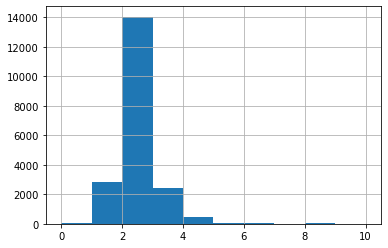

In [86]:
games_df['minplayers'].hist() 

In [87]:
games_df['minplayers'].max() #10. Ok.
games_df['minplayers'].min() # 0? Let's investigate further.

0

In [88]:
games_df.loc[games_df['minplayers'] == 0]

,name,yearpublished,sortindex,minplayers,maxplayers,minplaytime,maxplaytime,minage,usersrated,average,stddev,avgweight,numweights,numcomments,boardgamehonor,boardgamecategory,boardgamemechanic,boardgamefamily,age_classification,name_len
2297,Double Decktet,2008,2298,0,0,30,30,0,472,7.47638,1.44352,1.9655,29,336,['2009 Golden Geek Best Print & Play Board Gam...,"['Card Game', 'Game System', 'Print & Play']","['Card Game', 'Game System', 'Print & Play']",['Decktet Games'],modern,14
2570,Unpublished Prototype,0,2571,0,0,0,0,0,705,6.93858,2.46193,2.4667,75,1013,['None'],['(Unpublished)'],['(Unpublished)'],"['Admin: Miscellaneous Placeholder', 'Admin: U...",NaN,21
2788,Traditional Card Games,0,2789,0,0,0,0,0,813,6.59868,1.68549,1.9683,63,373,['None'],"['Card Game', 'Game System']","['Card Game', 'Game System']","['Admin: Miscellaneous Placeholder', 'Traditio...",NaN,22
2974,Stonewall Jackson's Way II,2013,2975,0,2,240,720,0,201,8.47761,1.25973,3.7727,22,73,['None'],"['American Civil War', 'Wargame']","['Dice Rolling', 'Hexagon Grid']",['Great Campaigns of the American Civil War'],modern,26
3121,Outside the Scope of BGG,0,3122,0,0,0,0,0,547,6.72534,2.18702,1.6582,79,1360,['None'],['(Unknown)'],['(Unknown)'],"['Admin: Miscellaneous Placeholder', 'Admin: O...",NaN,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19601,Worlds of Heroes & Tyrants Hell,2003,19602,0,0,10,10,8,3,3.00000,1.63299,0.0000,0,2,['None'],['Expansion for Base-game'],['Expansion for Base-game'],['Worlds of Heroes & Tyrants'],modern,32
19602,Worlds of Heroes & Tyrants Hell Card Expansio...,2003,19603,0,0,10,10,8,1,5.00000,0.00000,0.0000,0,2,['None'],['Expansion for Base-game'],['Expansion for Base-game'],['Worlds of Heroes & Tyrants'],modern,74
19603,Worlds of Heroes & Tyrants Hell Card Expansio...,2003,19604,0,0,10,10,8,1,5.00000,0.00000,0.0000,0,1,['None'],['Expansion for Base-game'],['Expansion for Base-game'],['Worlds of Heroes & Tyrants'],modern,63
19663,The Cities Game,1970,19664,0,0,60,120,0,10,4.95000,2.35000,2.6667,3,7,['None'],"['City Building', 'Economic', 'Political']","['City Building', 'Economic', 'Political']",['First edition'],modern,15


Rows with zero minplayers tend to also have zeroes in many other columns like yearpublishe, maxplayers, minage. This comes back to the hipotesis that these zeroes were originally missing values. This is data that should probably be removed from the dataset.

Also, we can see a game called "Outside the Scope of BGG". This data is most certainly scraped from BGG.

In [89]:
games_df['maxplayers'].max() #999 players?

999

In [90]:
games_df.sort_values(by='maxplayers').tail(20)

,name,yearpublished,sortindex,minplayers,maxplayers,minplaytime,maxplaytime,minage,usersrated,average,stddev,avgweight,numweights,numcomments,boardgamehonor,boardgamecategory,boardgamemechanic,boardgamefamily,age_classification,name_len
127,\u6b61\u8fce\u4f86\u5230,2018,128,1,100,25,25,10,10627,7.65254,1.11049,1.8333,204,1536,['2018 Cardboard Republic Socializer Laurel No...,['City Building'],"['Paper-and-Pencil', 'Pattern Building']","['Roll-and-write', 'Welcome To...']",modern,24
16230,Lumps,2008,16231,1,100,15,0,8,40,5.27500,1.77112,1.0000,5,23,['None'],['Dice'],['Dice Rolling'],"['First edition', 'Second edition']",modern,5
15259,Jetpack Unicorn,2013,15260,3,100,15,15,12,42,5.48214,2.04153,1.0000,3,17,['None'],"['Card Game', 'Humor', 'Party Game']",['Storytelling'],['Crowdfunding: Kickstarter'],modern,15
19183,Karmas,1992,19184,1,100,30,30,9,5,5.80000,1.32665,0.0000,0,3,['None'],['Dice'],['Dice'],['First edition'],modern,6
518,Cartographers A Roll Player Tale,2019,519,1,100,30,45,10,2279,7.69059,1.13448,1.9683,63,453,['None'],"['Fantasy', 'Territory Building']","['Line Drawing', 'Paper-and-Pencil']","['Polyominoes', 'Roll Player', 'Roll-and-write...",modern,33
10243,Floor Plan,2020,10244,1,100,20,40,0,43,6.80233,1.45130,0.0000,0,31,['None'],"['Dice', 'Print & Play', 'Puzzle']","['Dice Rolling', 'Simultaneous Action Selection']","['Admin: Unreleased Games', 'Roll-and-write']",modern,10
18770,They're at the Post,1975,18771,1,100,60,60,10,24,6.35417,2.07404,2.0000,1,16,['None'],"['Racing', 'Sports']",['Betting and Bluffing'],['Sports: Horse Racing'],modern,19
10830,Haggle,1963,10831,10,100,120,300,10,50,6.55244,1.51822,2.1000,10,37,['None'],"['Math', 'Negotiation', 'Puzzle']","['Hand Management', 'Set Collection', 'Trading']",['A Gamut of Games'],modern,6
10645,Rapid Recall,1993,10646,4,100,20,20,16,77,6.19675,1.36905,1.5000,4,37,['None'],"['Memory', 'Party Game']",['Team-Based Game'],['First edition'],modern,12
4202,Prawo D\u017cungli,2007,4203,2,100,10,10,8,441,6.52438,1.55751,1.3939,33,50,['None'],"['Action / Dexterity', 'Card Game', 'Party Game']",['Pattern Recognition'],['First edition'],modern,18


Looking up a few of those games on bgg, some times it looks like there is some sense to the value of max players:

https://boardgamegeek.com/boardgame/3867/hammer-thor-game-norse-mythology<br>

But this is not always true. Values like 999 and 100 are placeholders for games with undefined number of max players.

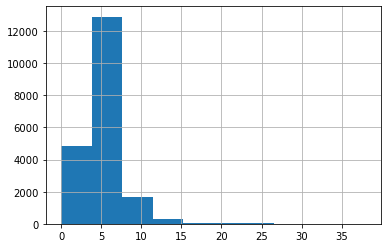

In [91]:
games_df.loc[games_df['maxplayers'] < 40, 'maxplayers'].hist()

Looking at the histogram, the maxplayers number could be clipped to an arbitrary value, like 20, since it's not very realistic to play a board game with 100 or 999 people.

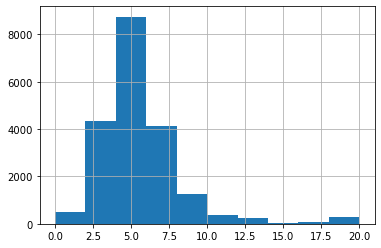

In [92]:
games_df['maxplayers'].clip(0,20).hist()

In [93]:
games_df

,name,yearpublished,sortindex,minplayers,maxplayers,minplaytime,maxplaytime,minage,usersrated,average,stddev,avgweight,numweights,numcomments,boardgamehonor,boardgamecategory,boardgamemechanic,boardgamefamily,age_classification,name_len
0,Gloomhaven,2017,1,1,4,60,120,12,31254,8.85292,1.59819,3.8078,1311,5972,['2017 Best Science Fiction or Fantasy Board G...,"['Adventure', 'Exploration', 'Fantasy', 'Fight...","['Campaign / Battle Card Driven', 'Cooperative...","['Campaign Games', 'Components: Miniatures', '...",modern,10
1,Pandemic Legacy Season 1,2015,2,2,4,60,60,13,34729,8.62499,1.59463,2.8301,971,5477,['2015 Cardboard Republic Immersionist Laurel ...,"['Environmental', 'Medical']","['Action Points', 'Cooperative Game', 'Hand Ma...","['Campaign Games', 'Legacy', 'Pandemic']",modern,25
2,Terraforming Mars,2016,3,1,5,120,120,12,48339,8.42299,1.36938,3.2313,1863,7274,['2016 Cardboard Republic Architect Laurel Nom...,"['Economic', 'Environmental', 'Industry / Manu...","['Card Drafting', 'End Game Bonuses', 'Hand Ma...","['Fryxgames Future Timeline', 'Planets: Mars',...",modern,17
3,Through the Ages A New Story of Civilization,2015,4,2,4,120,120,14,18269,8.49419,1.49542,4.3850,891,2660,['2015 Golden Geek Best Strategy Board Game No...,"['Card Game', 'Civilization', 'Economic']","['Action Points', 'Auction/Bidding', 'Auction:...","['Tableau Building', 'Through the Ages']",modern,45
4,Brass Birmingham,2018,5,2,4,60,120,14,10070,8.62031,1.22876,3.9122,467,1702,['2018 Golden Geek Best Board Game Artwork & P...,"['Economic', 'Industry / Manufacturing', 'Tran...","['Hand Management', 'Income', 'Loans', 'Market...","['Beer', 'Brass', 'Cities: Birmingham (England...",modern,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,Franchise,1990,19996,2,8,90,90,0,3,6.00000,2.94392,0.0000,0,2,['None'],"['Economic', 'Negotiation']","['Simulation', 'Trading']",['Sports: Baseball'],modern,9
19996,Punto y Raya,1988,19997,2,2,20,20,0,1,4.00000,0.00000,0.0000,0,2,['None'],['Abstract Strategy'],['Enclosure'],['Dots and Boxes'],modern,12
19997,3 Up,1972,19998,2,4,20,20,5,1,6.00000,0.00000,0.0000,0,4,['None'],"['Abstract Strategy', 'Childrens Game']",['Pattern Building'],"['Airfix edition', 'Lakeside edition', 'Wexler...",modern,4
19998,Dino-Checkers,1989,19999,2,2,30,30,6,20,5.77500,1.76405,0.0000,0,13,['None'],"['Abstract Strategy', 'Childrens Game']",['Area Majority / Influence'],['Animals: Dinosaurs'],modern,13


## minplaytime and maxplaytime

We are going to use a bit different approach for this one

In [94]:
# I noticed a lot of minplaytime == maxplaytime
# Want to see how ofter those are different
# 74.5% of the time
eq_playtime = games_df['minplaytime'] == games_df['maxplaytime']
(eq_playtime).sum()/len(games_df)

0.7452

In [95]:
# is maiplaytime always >= minplaytime?

(games_df['maxplaytime'] >= games_df['minplaytime']).all()

# Actually not. Probably because of zeroed maxplaytime

False

In [96]:
games_df.loc[(games_df['maxplaytime'] < games_df['minplaytime'])&(games_df['maxplaytime'] != 0)]

,name,yearpublished,sortindex,minplayers,maxplayers,minplaytime,maxplaytime,minage,usersrated,average,stddev,avgweight,numweights,numcomments,boardgamehonor,boardgamecategory,boardgamemechanic,boardgamefamily,age_classification,name_len
5359,Clacks A Discworld Board Game,2015,5360,1,4,45,30,8,327,6.30138,1.58865,2.5556,9,81,['None'],"['Abstract Strategy', 'Novel-based']","['Action Points', 'Cooperative Game', 'Pattern...",['Discworld Games'],modern,30
10437,Sotland Yard Hunting Mister X,2011,10438,2,4,25,15,8,207,5.87068,1.42580,1.4615,13,55,['None'],"['Deduction', 'Murder/Mystery', 'Transportation']",['Point to Point Movement'],"['Characters: Mister X', 'Cities: London (Engl...",modern,30


There are actually a couple of games that have maxplaytime < minplaytime. These are actually errors on the website.
https://boardgamegeek.com/boardgame/140279/clacks-discworld-board-game <br>
https://boardgamegeek.com/boardgame/94837/scotland-yard-hunting-mister-x

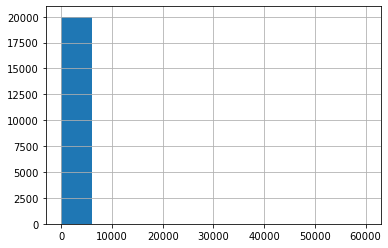

In [97]:
# What about the distribution?
games_df['minplaytime'].hist() 

In [98]:
# A few games with ver large playtime
games_df.loc[games_df['minplaytime'] > 200].sort_values(by = 'minplaytime')

,name,yearpublished,sortindex,minplayers,maxplayers,minplaytime,maxplaytime,minage,usersrated,average,stddev,avgweight,numweights,numcomments,boardgamehonor,boardgamecategory,boardgamemechanic,boardgamefamily,age_classification,name_len
6431,1828,2018,6432,3,5,210,420,16,52,8.40962,0.833092,4.1667,6,24,['None'],"['Economic', 'Trains', 'Transportation']","['Auction/Bidding', 'Network and Route Buildin...","['18xx', 'Country: USA']",modern,4
7514,A Victory Complete The Battle of Tannenberg,2011,7515,2,2,210,210,12,76,6.97434,1.185060,2.3846,13,64,['None'],"['Dice', 'Wargame', 'World War I']","['Chit-Pull System', 'Dice Rolling', 'Hexagon ...","['Country: Poland', 'Guerrilla Print', 'Intern...",modern,44
8490,Borodino Napoleon in Russia 1812,2012,8491,2,2,210,210,0,66,7.10606,1.632430,2.2222,9,35,['None'],"['Napoleonic', 'Wargame']","['Area Movement', 'Area-Impulse', 'Dice Rolling']","['Block wargames', 'Columbias Great Battles of...",modern,33
4614,PQ-17 Arctic Naval Operations 1941-1943,2009,4615,2,2,210,210,0,189,7.27607,1.710190,4.0750,40,127,['None'],"['Nautical', 'Wargame', 'World War II']","['Dice Rolling', 'Hexagon Grid', 'Secret Unit ...","['Block wargames', 'Region: Arctic']",modern,40
4702,Marne 1918 Friedensturm,2006,4703,2,2,210,1200,14,123,8.02276,1.515650,3.2273,22,56,['2007 Charles S. Roberts Best Pre-World War I...,"['Wargame', 'World War I']","['Dice Rolling', 'Hexagon Grid']",['Country: France'],modern,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12789,The Enigma Box,2017,12790,1,4,6000,10000,12,55,6.98727,2.387850,3.8571,7,25,['None'],"['Adventure', 'Deduction', 'Exploration', 'Mem...","['Cooperative Game', 'Memory', 'Paper-and-Penc...","['Crowdfunding: Kickstarter', 'Digital Hybrid']",modern,14
1182,Empires in Arms,1983,1183,2,7,6000,12000,14,1188,7.56682,1.786240,4.4100,200,510,['None'],"['Economic', 'Napoleonic', 'Negotiation', 'Pol...","['Area Movement', 'Dice Rolling', 'Secret Unit...",['Empires in Harm'],modern,15
8682,Drang Nach Osten!,1973,8683,2,4,12000,12000,12,72,6.83889,1.691860,4.2222,9,48,['None'],"['Wargame', 'World War II']","['Dice Rolling', 'Hexagon Grid', 'Simulation']",['Europa Series'],modern,17
5600,1914 Offensive \u00e0 outrance,2013,5601,2,4,17280,17280,0,96,7.99896,1.366450,3.9231,13,80,['None'],"['Wargame', 'World War I']",['Hexagon Grid'],"['1914 series', 'Country: Belgium', 'Country:...",modern,31


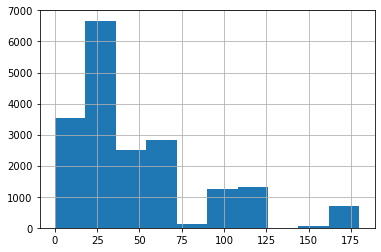

In [99]:
#still not meaningful
games_df.loc[games_df['minplaytime'] < 200, 'minplaytime'].hist()

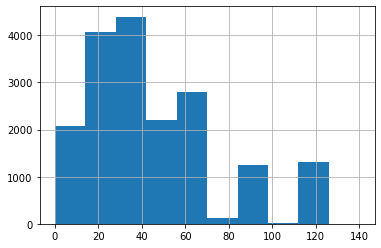

In [100]:
games_df.loc[games_df['minplaytime'] < 150, 'minplaytime'].hist()

The main thing that needs to be observed here is that there are about 1k games that have a very long playtime (from 200 to 600000!). These games tend to be wargames or economic games with mechanichs like hexgrid.

If we filter out those games and "zoom in" in the games with playtime less than 200, we can see that the the boardgames tend to be grouped into clusters. There is a lot of games from 0 to 45; thensome from 45 to 75, etc...

This distribution suggests that the playtime variable would be better treated as playtime range.

Very quick -> up to 45 minutes <br>
Quick -> 45 to 75 <br>
Medium -> 75 to 100 <br>
Long -> 100 to 140 <br>
Very long -> 140 to 200 <br>
Very very long -> Over 200 <br>

And since minplaytime and maxplaytime most ofter equal to each oher, we can assess that they offer redundant information. We can ignore the maxplaytime column an utilize the minplaytime to make our categories.

In [101]:
games_df['playtime_range'] = pd.cut(
    games_df['minplaytime'], 
    bins = [0, 45, 75, 100, 140, 200, np.inf], 
    right=False, 
    labels=['Very quick', 'Quick', 'Medium', 'Medium to long', 'Long', 'Very long']
    )

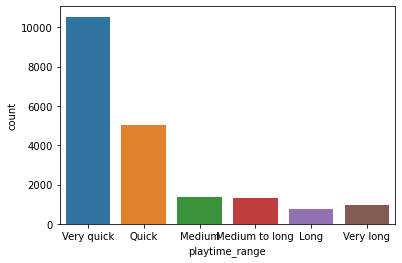

In [102]:
sns.countplot(data = games_df, x = 'playtime_range')

## minage

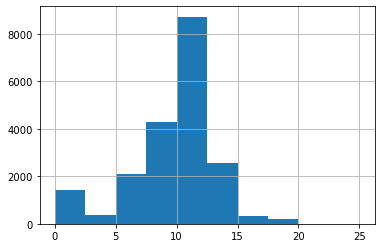

In [103]:
games_df['minage'].hist()

There is a spike at minage = 0, but that's expected because we already know the whole thing about zeroes in this dataset. Otherwise, the distribution looks fine. All good.

## usresrated

(0.0, 2500.0)

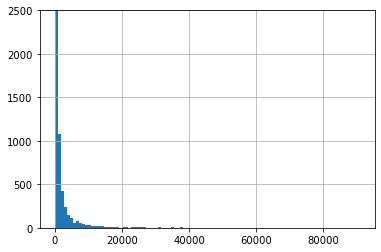

In [104]:
games_df['usersrated'].hist(bins = 100).set_ylim(0, 2500)

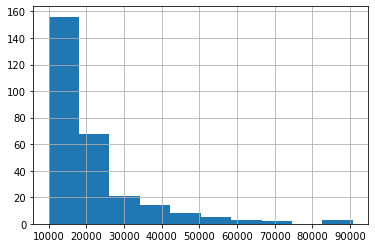

In [105]:
games_df.loc[games_df['usersrated'] > 10000, 'usersrated'].hist()

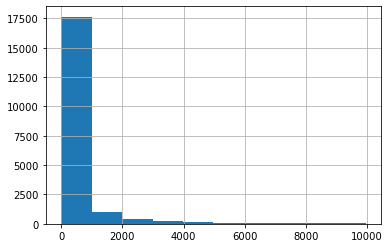

In [106]:
games_df.loc[games_df['usersrated'] <= 10000, 'usersrated'].hist()

At a first glance, usersrates seem to follow a exponential distribution. The extreme values are probably not outliers, just point of tail of the distribution. There is nothing about this really. Still, worth checking out the games with least and most usersrated, just in case. 

In [107]:
games_df.sort_values(by = 'usersrated')

,name,yearpublished,sortindex,minplayers,maxplayers,minplaytime,maxplaytime,minage,usersrated,average,...,avgweight,numweights,numcomments,boardgamehonor,boardgamecategory,boardgamemechanic,boardgamefamily,age_classification,name_len,playtime_range
19819,Mysteries by Vincent Women Only \u2013 Pushin...,0,19820,8,8,180,180,18,0,0.00000,...,0.0000,0,0,['None'],"['Deduction', 'Murder/Mystery']",['Role Playing'],['Mysteries by Vincent'],NaN,62,Long
19778,Lifts & Runs,2002,19779,2,4,60,60,0,0,0.00000,...,0.0000,0,0,['None'],"['Dice', 'Environmental', 'Party Game', 'Sports']",['Roll / Spin and Move'],['Sports: Winter Sports'],modern,12,Quick
18548,Tower of Babylon,0,18549,0,0,0,0,0,0,0.00000,...,0.0000,0,0,['None'],['Freie Spiel'],['Freie Spiel'],"['Ancient: Babylon', 'Ancient: Mesopotamia']",NaN,16,Very quick
19777,3-Ring Circus Card Game,1960,19778,2,4,20,20,0,0,0.00000,...,0.0000,0,0,['None'],"['Card Game', 'Childrens Game']","['Card Game', 'Childrens Game']","['Admin: Better Description Needed!', 'Animals...",modern,23,Very quick
19137,Nieznaika on the Moon,1994,19138,2,8,60,60,8,0,0.00000,...,3.0000,1,0,['None'],['Economic'],['Storytelling'],"['Admin: Better Description Needed!', 'Moon/Lu...",modern,21,Quick
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,Dominion,2008,82,2,4,30,30,13,71730,7.63451,...,2.3606,4759,12612,"['2008 Meeples Choice Award', '2008 Origins Aw...","['Card Game', 'Medieval']","['Deck', 'Delayed Purchase', 'Hand Management'...","['Crowdfunding: Wspieram', 'Dominion', 'Mensa ...",modern,8,Very quick
48,7 Wonders,2010,49,2,7,30,30,10,74520,7.77014,...,2.3367,4203,12608,['2011 Spiel des Jahres Kennerspiel des Jahres...,"['Ancient', 'Card Game', 'City Building', 'Civ...","['Card Drafting', 'Drafting', 'Hand Management...","['7 Wonders', 'Tableau Building']",modern,9,Very quick
82,Pandemic,2008,83,2,4,45,45,8,89581,7.62214,...,2.4190,5038,14976,['2008 Golden Geek Best 2-Player Board Game No...,['Medical'],"['Action Points', 'Cooperative Game', 'Hand Ma...",['Pandemic'],modern,8,Quick
160,Carcassonne,2000,161,2,5,30,45,7,90370,7.42103,...,1.9210,7104,16961,"['2001 Spiel des Jahres Winner', '2000 Meeples...","['City Building', 'Medieval', 'Territory Build...","['Area Majority / Influence', 'Map Addition', ...","['Carcassonne', 'Country: France', 'Languedoc ...",modern,11,Very quick


Nothing in particular call my attention here. Except for maybe the fact that the games with the most ratings have sortindex bellow 1000 (and the least rated veru close to 19k). This may mean that games that are in BGG for longer tend to have more reviews. But we will explore more of the relationships later. 

## avg e stdev

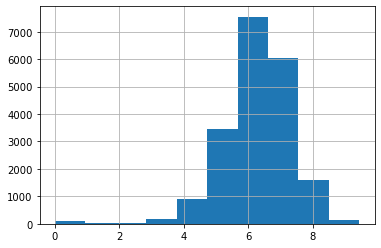

In [108]:
games_df['average'].hist()

Normalish distribution. There's a spike around zero. Probably the bad data we are familiar with.

In [109]:
games_df.sort_values(by = 'average')

,name,yearpublished,sortindex,minplayers,maxplayers,minplaytime,maxplaytime,minage,usersrated,average,...,avgweight,numweights,numcomments,boardgamehonor,boardgamecategory,boardgamemechanic,boardgamefamily,age_classification,name_len,playtime_range
19118,Quickit,1996,19119,2,22,20,20,8,0,0.00000,...,0.0,0,0,['None'],"['Abstract Strategy', 'Dice', 'Fantasy', 'Spor...",['Role Playing'],['Sports: Cricket'],modern,7,Very quick
19816,Mysteries by Vincent Hard Drive Homicide,1998,19817,8,8,180,180,18,0,0.00000,...,0.0,0,0,['None'],"['Deduction', 'Murder/Mystery']",['Role Playing'],['Mysteries by Vincent'],modern,41,Long
19689,Der Sport-Vagabund,0,19690,2,6,45,45,6,0,0.00000,...,0.0,0,3,['None'],['Racing'],['Roll / Spin and Move'],"['First edition', 'Painted meeples edition']",NaN,18,Quick
19909,An Evening of Murder The Final Act,2000,19910,8,8,180,180,18,0,0.00000,...,0.0,0,0,['None'],"['Deduction', 'Murder/Mystery', 'Party Game']",['Role Playing'],['Max Haines invites you to An Evening of Murd...,modern,35,Long
19910,Fence,1955,19911,2,4,60,60,0,0,0.00000,...,0.0,0,1,['None'],"['Territory Building', 'Word Game']","['Territory Building', 'Word Game']",['First edition'],modern,5,Quick
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14111,Animator vs Animation,2018,14112,2,8,15,30,8,39,9.25641,...,1.0,1,32,['None'],"['Card Game', 'Fighting', 'Memory', 'Party Game']","['Card Drafting', 'Hand Management', 'Memory',...",['Crowdfunding: Kickstarter'],modern,21,Very quick
9023,Infinity Defiance,2020,9024,1,4,45,60,14,63,9.28131,...,0.0,0,26,['None'],['Science Fiction'],"['Campaign / Battle Card Driven', 'Cooperative...","['Admin: Better Description Needed!', 'Admin: ...",modern,17,Quick
14926,Jurassic World Miniature Game,2020,14927,2,0,60,60,14,36,9.33333,...,2.0,1,15,['None'],"['Miniatures', 'Wargame']","['Action Queue', 'Deck', 'Variable Phase Order']","['Admin: Unreleased Games', 'Crowdfunding: Kic...",modern,29,Quick
14113,Drinks & Daggers,2019,14114,2,6,30,30,21,54,9.38889,...,2.0,2,44,['None'],"['Card Game', 'Fantasy', 'Fighting', 'Mature /...","['Cooperative Game', 'Hand Management', 'Role ...",['Crowdfunding: Kickstarter'],modern,16,Very quick


Ok, not quite, actually. Games with average == 0 & stdev == 0 may be games that were never rated. If we want to do any analysis on average ratings, we should probably exclude this rows.

## avgweight and numweights

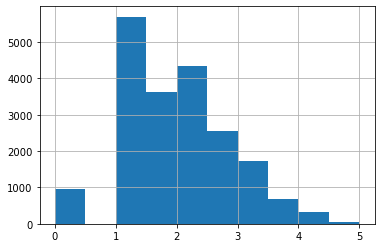

In [110]:
games_df['avgweight'].hist()

By researching the bgg website, we can figure out that the weight refers to categorical variable that means how hard/complex the game is. This variable goes from Light (1) to Heavy (5). This may have some relation to how long the game is. But then again, we'll explore these relations later.

It looks like easiear games are more common than harder games.

In [111]:
games_df.loc[games_df['avgweight'] == 0]

,name,yearpublished,sortindex,minplayers,maxplayers,minplaytime,maxplaytime,minage,usersrated,average,...,avgweight,numweights,numcomments,boardgamehonor,boardgamecategory,boardgamemechanic,boardgamefamily,age_classification,name_len,playtime_range
4322,Monikers More Monikers,2018,4323,4,20,60,60,18,108,8.31523,...,0.0,0,38,['None'],"['Card Game', 'Humor', 'Mature / Adult', 'Part...","['Acting', 'Card Drafting', 'Role Playing']",['Crowdfunding: Kickstarter'],modern,23,Quick
5153,The Red Dragon Inn 7 The Tavern Crew,2018,5154,2,4,30,60,13,99,8.16434,...,0.0,0,24,['None'],"['Card Game', 'Fantasy', 'Humor', 'Party Game']","['Betting and Bluffing', 'Hand Management', 'P...","['Crowdfunding: Kickstarter', 'The Red Dragon ...",modern,37,Very quick
5694,KLASK 4,2019,5695,4,4,10,10,8,94,7.52106,...,0.0,0,18,['None'],['Action / Dexterity'],['Action / Dexterity'],['KLASK'],modern,7,Very quick
6321,Codex Card-Time Strategy \u2013 Starter Set,2016,6322,2,2,45,45,13,102,6.99461,...,0.0,0,30,['None'],"['Card Game', 'Fantasy', 'Fighting', 'Video Ga...","['Deck', 'Hand Management', 'Secret Unit Deplo...",['Fantasy Strike'],modern,44,Quick
6513,Monikers Serious Nonsense,2019,6514,4,20,60,60,18,51,8.50980,...,0.0,0,12,['None'],"['Humor', 'Mature / Adult', 'Party Game']","['Acting', 'Card Drafting', 'Role Playing']","['Admin: Unreleased Games', 'Crowdfunding: Kic...",modern,26,Quick
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,Fascination Checkers,1962,19995,2,2,20,20,7,2,5.75000,...,0.0,0,1,['None'],['Abstract Strategy'],['Abstract Strategy'],['First edition'],modern,20,Very quick
19995,Franchise,1990,19996,2,8,90,90,0,3,6.00000,...,0.0,0,2,['None'],"['Economic', 'Negotiation']","['Simulation', 'Trading']",['Sports: Baseball'],modern,9,Medium
19996,Punto y Raya,1988,19997,2,2,20,20,0,1,4.00000,...,0.0,0,2,['None'],['Abstract Strategy'],['Enclosure'],['Dots and Boxes'],modern,12,Very quick
19997,3 Up,1972,19998,2,4,20,20,5,1,6.00000,...,0.0,0,4,['None'],"['Abstract Strategy', 'Childrens Game']",['Pattern Building'],"['Airfix edition', 'Lakeside edition', 'Wexler...",modern,4,Very quick


Similar to the average rating, games that have never been weighted by users have an weight of zero. We should keep that in mind. 

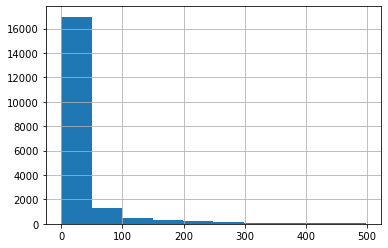

In [112]:
games_df.loc[games_df['numweights'] < 500, 'numweights'].hist()

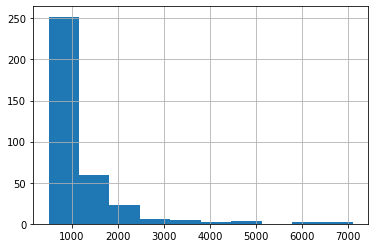

In [113]:
games_df.loc[games_df['numweights'] > 500, 'numweights'].hist()


The number o weights, which are probably the number os users that classified a game complexity, have a very similar behavior to the usersrated.

In [114]:
games_df.sort_values(by = 'numweights')

,name,yearpublished,sortindex,minplayers,maxplayers,minplaytime,maxplaytime,minage,usersrated,average,...,avgweight,numweights,numcomments,boardgamehonor,boardgamecategory,boardgamemechanic,boardgamefamily,age_classification,name_len,playtime_range
19138,Wizard of Oz's Emerald Town,1998,19139,1,4,45,45,10,1,6.00000,...,0.0000,0,0,['None'],"['Fantasy', 'Novel-based']",['Cooperative Game'],"['Admin: Better Description Needed!', 'Wizard ...",modern,27,Quick
13793,Vollpfosten,2018,13794,3,8,20,20,7,38,6.03158,...,0.0000,0,6,['None'],"['Action / Dexterity', 'Party Game', 'Real-time']",['Pattern Recognition'],['EN/FR/GE/IT first edition'],modern,11,Very quick
18519,Ordino,1972,18520,2,6,30,30,0,1,6.00000,...,0.0000,0,1,['None'],"['Card Game', 'Racing']","['Card Game', 'Racing']","['Admin: Better Description Needed!', 'Ordino']",modern,6,Very quick
7007,Exceed Street Fighter \u2013 M. Bison Box,2019,7008,2,2,15,25,10,44,8.59091,...,0.0000,0,8,['None'],"['Fighting', 'Video Game Theme']","['Hand Management', 'Point to Point Movement',...",['EXCEED Fighting System'],modern,42,Very quick
19210,Key Whiz,1990,19211,2,4,20,20,10,0,0.00000,...,0.0000,0,0,['None'],"['Abstract Strategy', 'Card Game']","['Abstract Strategy', 'Card Game']","['Abstract Strategy', 'Card Game']",modern,8,Very quick
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Pandemic,2008,83,2,4,45,45,8,89581,7.62214,...,2.4190,5038,14976,['2008 Golden Geek Best 2-Player Board Game No...,['Medical'],"['Action Points', 'Cooperative Game', 'Hand Ma...",['Pandemic'],modern,8,Quick
28,Agricola,2007,29,1,5,30,150,12,59458,7.97387,...,3.6372,5849,12176,"['2007 Meeples Choice Award', '2008 Deutscher ...","['Animals', 'Economic', 'Farming']","['Action Drafting', 'Automatic Resource Growth...","['Agricola', 'Animals: Cattle', 'Animals: Hors...",modern,8,Very quick
21,Puerto Rico,2002,22,3,5,90,150,12,58836,8.02082,...,3.2850,5852,11515,['2002 Deutscher Spiele Preis Best Family/Adul...,"['City Building', 'Economic', 'Farming']","['Action Drafting', 'End Game Bonuses', 'Follo...","['Alea Big Box', 'Colonial Theme', 'Country: P...",modern,11,Medium
352,The Settlers of Catan,1995,353,3,4,60,120,10,90730,7.17333,...,2.3331,7010,17143,['1995 Deutscher Spiele Preis Best Family/Adul...,['Negotiation'],"['Dice Rolling', 'Hexagon Grid', 'Income', 'Mo...","['Catan', 'Promotional Board Games']",modern,21,Quick


Games with more numweights alse have lower sortindexes. Wouldn't be surprised if this variable is strongly correlated to usersrate. We'll explore this later.

## numcomments

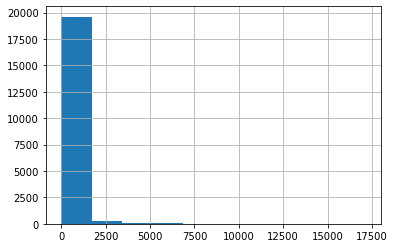

In [116]:
games_df['numcomments'].hist()

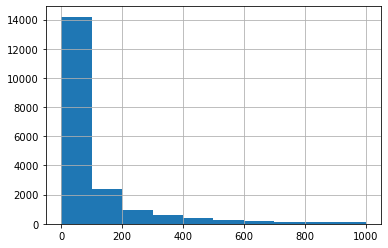

In [117]:
games_df.loc[games_df['numcomments'] < 1000, 'numcomments'].hist()

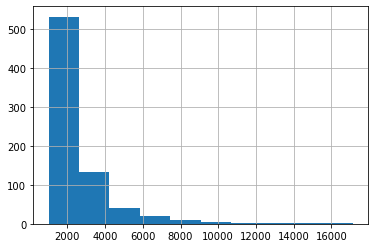

In [118]:
games_df.loc[games_df['numcomments'] > 1000, 'numcomments'].hist()

Similar case to usersrated and numweights. 

## Summary and most important conclusions

- In the whole dataset, zeroes often mean missing values
- It may be worth excluding rows with missing values (0) on the columns yearpublish, minplayers, maxplayers and minplaytime, because it is probably bad data
- For very old games, the yearpublished is an estimate, and therefore has different meaning. Games should be categorized between modern and ancient games, and analyzed separately.
- games with undefined maxplayer often use very large values like 100 e 999 as placeholders. Since is not reasonable to expect a board game to be actually played by hundreds of players, it's reasonable to clip these values to a max of 20  before investigating relationships.
- minplaytime and maxplaytime are equal on 74% of the rows, so, they may be redundant. Also, we can observe on the distribution of these variables that games tend to cluser around a few specific ranges. This all suggests that is better transform these variables into a single categoric playtime_range variable.
- usersrate, numweight and numcomments follow a very similar distribution that looks exponential. These three are very likely correlated. This hypotesis will be explored further in the next chapter.
- Games that have never been rated and/or weighted have values of average and weight = 0

# Cleaning the data

In [119]:
# Is it reasonable to drop any rows with zeroes?

rows_with_zeroes = (games_df == 0).any(axis=1)
rows_with_zeroes.sum()

2875

In [120]:
2875/len(games_df) #0.14375

# Dropping just short of 15% of the dataset of rows with problems
# This is quite a chunk of data. But we are also dealing with most of the problems in one move.
# This worth it

clean_df = games_df.loc[~rows_with_zeroes]

In [121]:
#we also should focus on modern games
clean_df = clean_df.loc[clean_df['age_classification'] == 'modern']

In [122]:
len(clean_df)/len(games_df)

# We got rid of more or less 15% of the data

0.85255

# Relationships between variables

It's a good idea to start by plotting the correlation matrix

In [123]:
clean_df.corr()

,yearpublished,sortindex,minplayers,maxplayers,minplaytime,maxplaytime,minage,usersrated,average,stddev,avgweight,numweights,numcomments,name_len
yearpublished,1.000000,-0.312518,-0.036702,0.015988,-0.054383,-0.015321,0.088050,0.036026,0.338095,-0.056599,-0.009964,-0.019116,0.006074,0.057519
sortindex,-0.312518,1.000000,0.094829,0.016441,-0.008829,-0.018648,-0.226755,-0.309392,-0.729269,0.344047,-0.351754,-0.286190,-0.357164,-0.030296
minplayers,-0.036702,0.094829,1.000000,0.072758,0.052995,0.014533,0.034828,-0.006229,-0.140338,0.051105,-0.156716,0.002973,-0.006923,-0.071818
maxplayers,0.015988,0.016441,0.072758,1.000000,-0.005028,-0.002710,-0.012705,-0.002242,-0.032631,0.043679,-0.077787,-0.005449,-0.004738,0.009054
minplaytime,-0.054383,-0.008829,0.052995,-0.005028,1.000000,0.463549,0.067780,-0.005481,0.031854,0.052185,0.131348,0.003720,-0.001809,0.034249
maxplaytime,-0.015321,-0.018648,0.014533,-0.002710,0.463549,1.000000,0.058765,-0.003376,0.056328,0.016434,0.107885,0.002266,-0.001377,0.027139
minage,0.088050,-0.226755,0.034828,-0.012705,0.067780,0.058765,1.000000,0.051222,0.322990,0.113695,0.515371,0.048560,0.058863,0.163096
usersrated,0.036026,-0.309392,-0.006229,-0.002242,-0.005481,-0.003376,0.051222,1.000000,0.197977,-0.105282,0.087819,0.922311,0.973546,0.000092
average,0.338095,-0.729269,-0.140338,-0.032631,0.031854,0.056328,0.322990,0.197977,1.000000,-0.236622,0.503918,0.171711,0.209053,0.115324
stddev,-0.056599,0.344047,0.051105,0.043679,0.052185,0.016434,0.113695,-0.105282,-0.236622,1.000000,0.049745,-0.086186,-0.113223,0.079431


By carefully reading the correlation matrix table, we see that the strongest correlations in the dataset are between the usersrated, numcomments and numweights (all above 0.90!). This had been already hypothesized while we were exploring the variables. All relate to how popular the games is.

owever it's also worth noting that they are also negatively correlated to sortindex. We already figured out that the data comes from the BGG website, so this may mean that games with lower sortindexes were entered in the website long ago and have been collecting reviews and comments for longer.

Let's do a matrix plot to better understand the nature of the relationship.

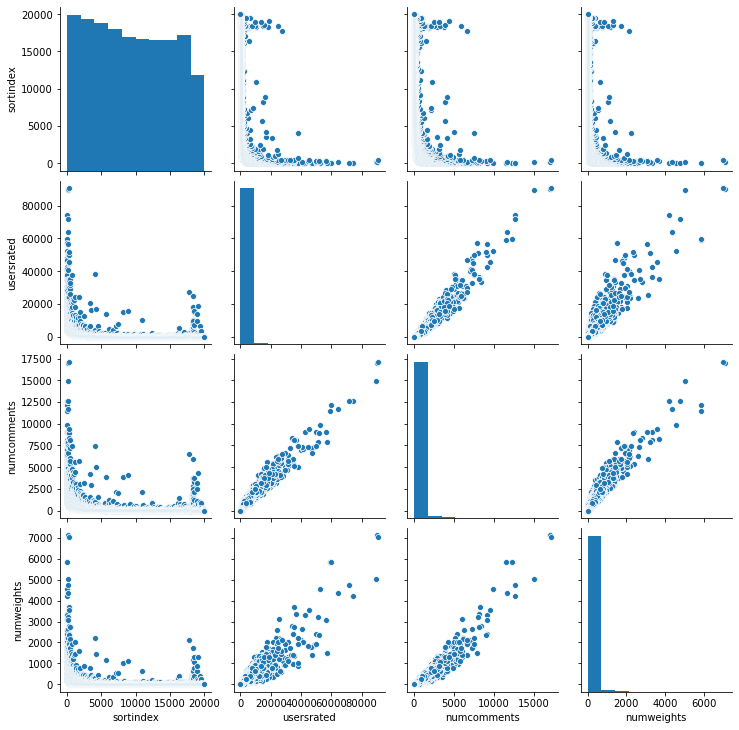

In [132]:
sns.pairplot(data= clean_df[['sortindex', 'usersrated', 'numcomments', 'numweights']])

After those, the strongest relationships are the ones relating to the average rating. It has a correlation coefficient of -0.72 with sortindex, 0.50 with minage and 0.33 with yearpublished.

These mean that games that were published on bgg earlier are better rated than more recent entries. Also that more mature and contemporary games are also associated with better ratings.

Visually however, aside from the relationship with the sortindex, these relationships are not so clear cut as the ones presented before.

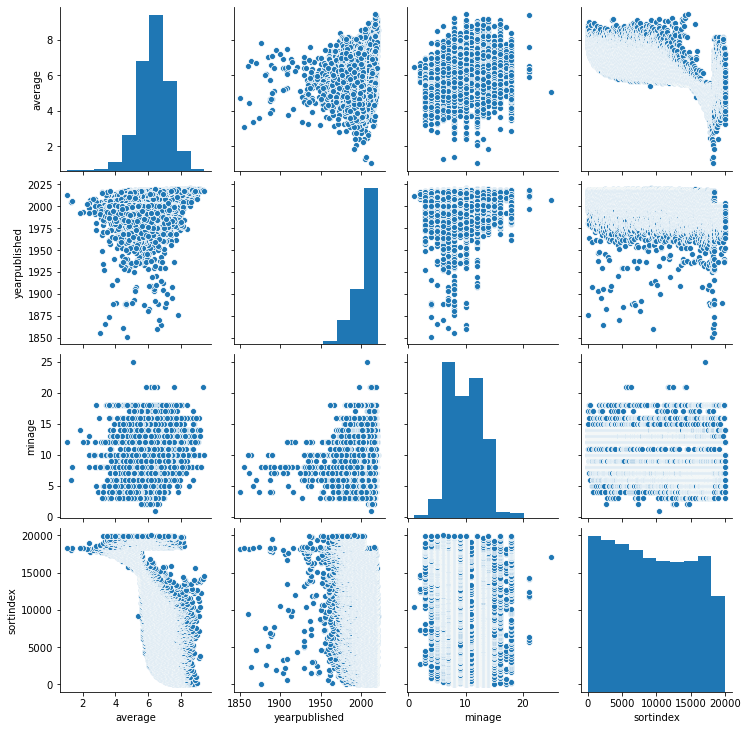

In [186]:
sns.pairplot(clean_df[['average', 'yearpublished', 'minage', 'sortindex']])

In [188]:
games_df.columns

Index(['name', 'yearpublished', 'sortindex', 'minplayers', 'maxplayers',
       'minplaytime', 'maxplaytime', 'minage', 'usersrated', 'average',
       'stddev', 'avgweight', 'numweights', 'numcomments', 'boardgamehonor',
       'boardgamecategory', 'boardgamemechanic', 'boardgamefamily',
       'age_classification', 'name_len', 'playtime_range'],
      dtype='object')

To finish, one final interesting relationship is that games with longer playtime tend to be associated with higher complexity (avgweight).

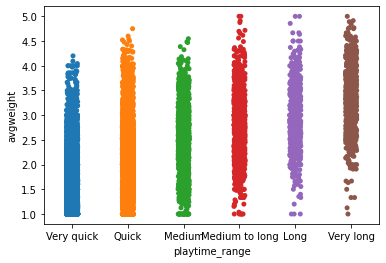

In [199]:
sns.stripplot(x=clean_df['playtime_range'], y = clean_df['avgweight'])